# Ordinary Least Squares -- Part II
## Course recap
This lab consists in implementing the **Ordinary Least Squares** (OLS) algorithm, which is **a linear regression with a least-squares penalty**. Given a training set $ D = \left\{ \left(x^{(i)}, y^{(i)}\right), x^{(i)} \in \mathcal{X}, y^{(i)} \in \mathcal{Y}, i \in \{1, \dots, n \}  \right\}$, recall (from lectures 1 and 2) OLS aims at minimizing the following cost function $J$:
$$J(\theta) = \dfrac{1}{2} \sum_{i = 1}^{n} \left( h\left(x^{(i)}\right) - y^{(i)} \right)^2$$
where 
$$h(x) = \sum_{j = 0}^{d} \theta_j x_j = \theta^T x.$$

For the sake of simplicity, we will be working on a small training set (the one we used in lectures 1 and 2):

| living area (m$^2$) | price (1000's BGN)|
|--------------------:|------------------:|
|                 50  |         30        |
|                 76  |         48        |
|                 26  |         12        |
|                102  |         90        |

## Defining the training set
**Exercise 1**: Define variables `X` and `Y` that will contain the features $\mathcal{X}$ and labels $\mathcal{Y}$ of the training set.

**Hint**: Do not forget the intercept!

In [1]:
X = [[1., 50.], [1., 76.], [1., 26.], [1., 102.]]
Y = [30., 48., 12., 90.]

# Y[3] = 300 # Outlier. Uncomment this line if you want to introduce an outlier.

In this simple example, the dimensionality is $d = 1$ (which means 2 features: don't forget the intercept!) and the number of samples is $n = 4$.

**Remark**: `1.` is written instead of `1` in order to avoid *integers operations*. For example, in some languages (including Python 2), the result of `1/2` is `0` and not `0.5`:

In [2]:
1/2

0

Instead, writing `1./2` forces a *float operation* and gives `0.5` as a result, which is what we want:

In [3]:
1./2

0.5

## Prediction function
**Exercise**: Define a function `predict` that takes as parameter *the feature vector* $x$ and *the model* $\theta$ and returns the predicted label:
$$ \hat{y} = h(x) = \theta^T x = \sum_{j = 0}^d \theta_j x_j$$

In [4]:
def predict(x, theta):
    y_hat = x[0] * theta[0] + x[1] * theta[1] # compute the dot product between 'theta' and 'x'
    return y_hat

## Defining the cost function
### Cost function on a single sample
**Exercise**: Define a function `cost_function` that takes as parameter *the predicted label* $y$ and *the actual label* $\hat{y}$ of a single sample and returns the value of the cost function for this pair. Recall from lectures 1 and 2 that it is given by:
$$ \ell \left( y, \hat{y} \right) = \dfrac{1}{2}\left( y - \hat{y} \right)^2$$

In [5]:
def cost_function(y, y_hat):
    loss = (y - y_hat) ** 2 / 2
    return loss

### Cost function on the whole training set
We are now able to compute the cost function for a single sample. We can easily compute the cost function for the whole training set by summing the cost function values for all the samples in the training set. Recall that the total cost function is given by:
$$J(\theta) = \dfrac{1}{2} \sum_{i = 1}^{n} \left( h\left(x^{(i)}\right) - y^{(i)} \right)^2$$
where, for all $i \in \{ 1, \dots, n \}$
$$h\left(x^{(i)}\right) = \sum_{j = 0}^{d} \theta_j x^{(i)}_j = \theta^T x^{(i)}$$
is the prediction of $x$ given the model $\theta$.

In [6]:
def cost_function_total(X, Y, theta):
    cost = 0 # initialize the cost with 0
    n = len(Y)
    for i in range(n): # iterate over the training set (n = 4 in our case)
        x = X[i] # get the ith feature vector
        y = Y[i] # get the ith label
        y_hat = predict(x, theta) # predict the ith label
        cost += cost_function(y, y_hat) # add the cost of the current sample to the total cost
    return cost

Let's now test the code written above and check the total cost function we would have when $\theta = [0, 0]$.

In [7]:
theta_0 = [0, 0]
cost_function_total(X, Y, theta_0)

5724.0

Note that this error is big, which is expectable because having $\theta = [0, 0]$ means always predicting $\hat{y} = 0$.

## Defining the gradient of the cost function
### Gradient on a single sample
**Exercise**: Define a function `gradient` that implements the gradient of the cost function for a given sample $(x, y)$. Recall from the lectures 1 and 2 that the gradient is given by:
$$\nabla J(\theta) = \left[ \dfrac{\partial}{\partial \theta_1} J(\theta), \dots, \dfrac{\partial}{\partial \theta_d} J(\theta) \right]^T$$
where, for all $j \in \{0, \dots, d \}$:
$$ \dfrac{\partial}{\partial \theta_j} J(\theta) = \left( h\left(x\right) - y \right) x_j. $$
**Hint**: Recall that $d = 1$, hence the gradient is of size $2$ (one value for $j = 0$, and another one for $j = 1$). Its two values are given by:
$$ \dfrac{\partial}{\partial \theta_0} J(\theta) = \left( h\left(x\right) - y \right) x_0 \quad \text{and} \quad 
\dfrac{\partial}{\partial \theta_1} J(\theta) = \left( h\left(x\right) - y \right) x_1. $$

In [8]:
def gradient(x, y, theta):
    grad = [0, 0]
    grad[0] = (predict(x, theta) - y) * x[0] # first value of the gradient 
    grad[1] = (predict(x, theta) - y) * x[1] # second value of the gradient
    return grad

Let's try the `gradient` function on a simple example ($\theta = [0, 0]$ on the first sample of the training set, *i.e.* $\left(x^{(0)}, y^{(0)}\right)$).

In [9]:
gradient(X[0], Y[0], theta_0)

[-30.0, -1500.0]

### Gradient on the whole training set
Now we are able to compute the gradient of the cost function on a single sample, we can easily compute `gradient_total`, the gradient of the cost function on the whole training set by summing the gradients for all the samples in the training set.

In [10]:
def gradient_total(X, Y, theta):
    grad_total = [0, 0] # initialize the gradient with zeros
    n = len(Y)
    for i in range(n): # iterate over the training set
        x = X[i] # get the ith feature vector
        y = Y[i] # get the ith label
        grad = gradient(x, y, theta) # predict the ith label given 'theta'
        grad_total[0] += grad[0] # add the gradient corresponding to theta[0]
        grad_total[1] += grad[1] # add the gradient corresponding to theta[1]
    return grad_total

Let's now test the code written above and check the total gradient we would have when $\theta = [0, 0]$

In [11]:
gradient_total(X, Y, theta_0)

[-180.0, -14640.0]

**Question**: What is the sign of the gradient values? What would it mean if we had such a gradient when applying a gradient descent?

**Hint**: Recall the gradient descent update:
$$\theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_j} J(\theta) \quad \text{for all } j \in \{0, \dots, d \}$$

**Answer**: Both values are negative, which means this gradient step would increase the value of $\theta$ due to fact we **substract** the gradient. This makes sense, because:
- we start with $\theta = [0, 0]$,
- we expect $\theta_0 > 0$ and $\theta_1 > 0$ because otherwise we could predict a negative price.

## Applying a gradient descent
### Gradient descent step implementation
We now have all the building blocs needed for the gradient descent algorithm, that is:
- The loss function
- The gradient
Indeed, the iterative update scheme of this algorithm is given by the following formula:
$$\theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_j} J(\theta)$$
for all $j \in \{0, \dots, d \}$. Recall that $\alpha$ is a parameter called the *learning rate* (or *step size*).

**Exercise**: Define a function called `gradient_descent_step` that performs an update on theta by applying the formula above.

In [12]:
def gradient_descent_step(X, Y, theta, alpha):
    theta_updated = [0, 0]
    grad = gradient_total(X, Y, theta)
    theta_updated[0] = theta[0] - alpha * grad[0]
    theta_updated[1] = theta[1] - alpha * grad[1]
    return theta_updated

Try to run a few iterations manually. Play with the value of $\alpha$ to see how it impacts the algorithm.

In [13]:
alpha = 0.0001
theta_1 = gradient_descent_step(X, Y, theta_0, alpha)
theta_2 = gradient_descent_step(X, Y, theta_1, alpha)
theta_2

[-0.0011927999999999973, 0.0938243999999997]

### Iterating gradient descent steps
The `gradient_descent_step` implements a single gradient step of the gradient descent algorithm. Implement a function called `gradient_descent` that starts from a given $\theta$ (exaple $\theta = [0, 0]$) and applies 100 gradient descent iterations. Display the total cost function $J(\theta)$ at each iteration.

In [14]:
def gradient_descent(X, Y, alpha):
    theta = [0, 0] # initializing theta with zeros (it can be initialized in another manner)
    n_iteration_max = 100
    loss_history = []
    for i_iteration in range(n_iteration_max):
        loss = cost_function_total(X, Y, theta)
        loss_history.append(loss)
        print("Iteration {:>2}. Current loss = {}".format(i_iteration, loss))
        theta = gradient_descent_step(X, Y, theta, alpha)
    loss = cost_function_total(X, Y, theta)
    loss_history.append(loss)
    print("Optimization complete. Final loss = {}".format(loss))
    return theta, loss_history

Play with the code you've just run. Try different values of $\alpha$ and see the impact it has.

Note: $\alpha = 0.0001$ works well in this case.

In [15]:
theta_trained_gd, loss_history = gradient_descent(X, Y, alpha)

Iteration  0. Current loss = 5724.0
Iteration  1. Current loss = 5037.312744
Iteration  2. Current loss = 4435.7926733
Iteration  3. Current loss = 3908.87660327
Iteration  4. Current loss = 3447.31148851
Iteration  5. Current loss = 3042.99192789
Iteration  6. Current loss = 2688.81782352
Iteration  7. Current loss = 2378.56969424
Iteration  8. Current loss = 2106.79945376
Iteration  9. Current loss = 1868.73473546
Iteration 10. Current loss = 1660.19508368
Iteration 11. Current loss = 1477.51853971
Iteration 12. Current loss = 1317.49733324
Iteration 13. Current loss = 1177.32154991
Iteration 14. Current loss = 1054.52978568
Iteration 15. Current loss = 946.965921541
Iteration 16. Current loss = 852.741259375
Iteration 17. Current loss = 770.201354036
Iteration 18. Current loss = 697.896959252
Iteration 19. Current loss = 634.558577041
Iteration 20. Current loss = 579.074163751
Iteration 21. Current loss = 530.469601184
Iteration 22. Current loss = 487.891589865
Iteration 23. Current

Let's have a more visual interpretation by plotting the loss over iterations.

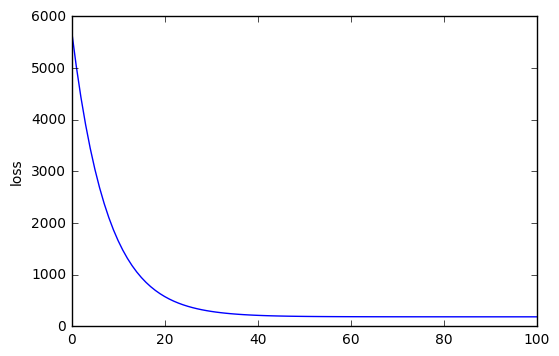

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.ylabel('loss')
plt.show()

In [17]:
theta_trained_gd

[-0.11087633725023004, 0.7567940140789401]

Let us see what the trained regression looks like. 

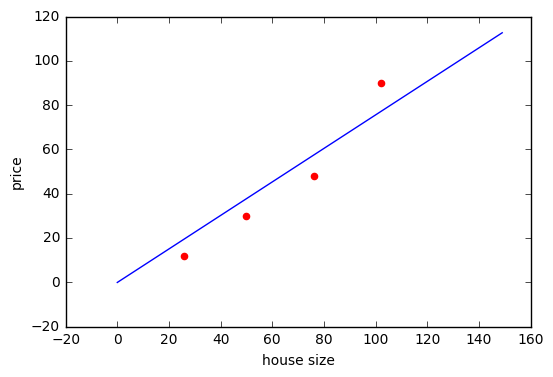

In [18]:
houses_sizes = range(150)
estimated_prices = [theta_trained_gd[0] + house_size * theta_trained_gd[1] for house_size in houses_sizes]
x1s = [x[1] for x in X]
plt.plot(houses_sizes, estimated_prices)
plt.ylabel("price")
plt.xlabel("house size")
plt.scatter(x1s, Y, color="red")
plt.show()

**Question**: Looks at the evolution of the cost function over time. What comment can you make?

**Answer**: The loss function constantly drops over time with this initial value of $\theta$ and this $\alpha$. It ends up reaching a plateau at around 186. It seems like the algorithm has converged to the optimal value of the cost function.

**Question**: What does the value `theta_trained` represent?

**Answer**: Recall that the model $\theta$ has to values, $\theta_0$ and $\theta_1$. Hence, with the model `theta_trained` we've learnt, price prediction would be:
$$ \text{price} = \theta_0 + \theta_1 \times \text{area}.$$

## Batch gradient descent vs. stochastic gradient descent
As we have seen during the lecture 1, the gradient descent methods are often split into 2 different subfamilies:
- **Batch methods** update $\theta$ after having computed the gradient on the whole training set
- **Stochastic methods** update $\theta$ after having computed the gradient on a single sample
The gradient descent we have implemented above (`gradient_descent_step` and `gradient_descent`) corresponds to the batch version because it sums the gradient of all the samples in the training set. 

**Exercise**: Try to implement the stochastic version of the gradient descent algorithm. You will need to define a function `stochastic_gradient_descent_step` that compute a stochastic gradient step (on a single $(x, y)$ sample) and a function `stochastic_gradient_descent` iterates 100 stochastic gradient descent steps and returns the trained model $\theta$.

** Solution**: We first define the function `stochastic_gradient_descent_step` that implements a stochastic gradient step.

In [19]:
def stochastic_gradient_descent_step(x, y, theta, alpha):
    theta_updated = [0, 0]
    grad = gradient(x, y, theta)
    theta_updated[0] = theta[0] - alpha * grad[0]
    theta_updated[1] = theta[1] - alpha * grad[1]
    return theta_updated

Then the `stochastic_gradient_descent` function that will do the iterations.

In [20]:
def stochastic_gradient_descent(X, Y, alpha):
    theta = [0, 0] # initializing theta with zeros (it can be initialized in another manner)
    n_iteration_max = 100
    loss_history = []
    n_samples = len(Y)
    for i_iteration in range(n_iteration_max):
        i_sample = i_iteration % n_samples
        loss = cost_function_total(X, Y, theta)
        loss_history.append(loss)
        print("Iteration {:>2}. Current loss = {}".format(i_iteration, loss))
        theta = stochastic_gradient_descent_step(X[i_sample], Y[i_sample], theta, alpha) # run the gradient update on a single sample
    loss = cost_function_total(X, Y, theta)
    loss_history.append(loss)
    print("Optimization complete. Final loss = {}".format(loss))
    return theta, loss_history

Let's now apply the algorithm with the same parameters.

In [21]:
theta_trained_sgd, loss_history_sgd = stochastic_gradient_descent(X, Y, alpha)

Iteration  0. Current loss = 5724.0
Iteration  1. Current loss = 3745.329318
Iteration  2. Current loss = 1229.58850556
Iteration  3. Current loss = 1215.4002507
Iteration  4. Current loss = 389.24889887
Iteration  5. Current loss = 233.848727077
Iteration  6. Current loss = 205.389900038
Iteration  7. Current loss = 222.353897307
Iteration  8. Current loss = 360.244624812
Iteration  9. Current loss = 223.650823333
Iteration 10. Current loss = 208.315174237
Iteration 11. Current loss = 226.1195284
Iteration 12. Current loss = 360.544262454
Iteration 13. Current loss = 223.744191112
Iteration 14. Current loss = 208.259993315
Iteration 15. Current loss = 226.051269403
Iteration 16. Current loss = 360.506758085
Iteration 17. Current loss = 223.72195803
Iteration 18. Current loss = 208.241787391
Iteration 19. Current loss = 226.030015382
Iteration 20. Current loss = 360.473292026
Iteration 21. Current loss = 223.701111748
Iteration 22. Current loss = 208.22314266
Iteration 23. Current loss

Here again, let's plot the loss history over iterations.

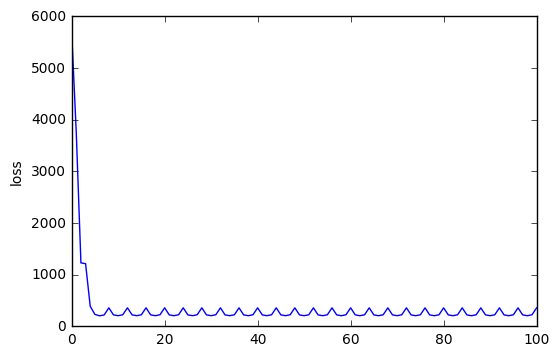

In [22]:
plt.plot(loss_history_sgd)
plt.ylabel('loss')
plt.show()

Again, let's look at the regression we obtain.

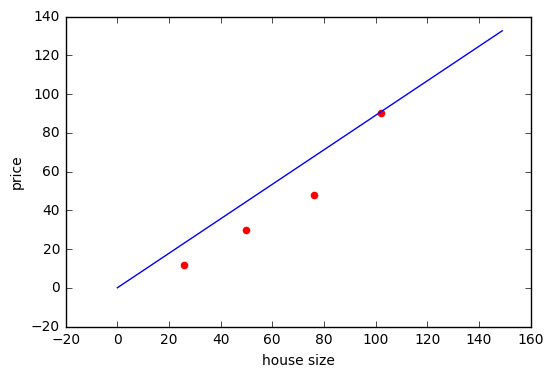

In [23]:
houses_sizes = range(150)
estimated_prices = [theta_trained_sgd[0] + house_size * theta_trained_sgd[1] for house_size in houses_sizes]
x1s = [x[1] for x in X]
plt.plot(houses_sizes, estimated_prices)
plt.ylabel("price")
plt.xlabel("house size")
plt.scatter(x1s, Y, color="red")
plt.show()

**Question**: Compare the results obtained when solving the OLS problem with stochastic gradient descent and batch gradient descent. Are the results the same? Why?

**Hint**: Plot the loss function.

**Answer**: The results are **not the same**, the loss function value differs **a lot**: More than 200 for the stochastic gradient descent, and about 186 for the batch gradient descent version. 

To understand what happens, let's look at what the function looks like. It is a function of 2 variables ($\theta_0$ and $\theta_1$), so we can use either a *3D plot* or a *contour plot* for visualize it.

The following code shows the *contour plot*. First, we need to define a grid of $\theta$ values on which we will evaluate the loss function. `theta0_vector` and `theta1_vector` define the values of $\theta_0$ and $\theta_1$ on which the function will be evaluated.

In [24]:
import numpy as np
dtheta = 0.001
theta0_vector = np.arange(-1,+1, dtheta)
theta1_vector = np.arange(-1,+1, dtheta)

Let's compute the value of the loss function for each pair $(\theta_0, \theta_1)$.

In [25]:
n0 = len(theta0_vector)
n1 = len(theta1_vector)
loss = np.zeros([n0, n1])
for i0 in range(n0):
    for i1 in range(n1):
        loss[i0, i1] = cost_function_total(X, Y, [theta0_vector[i0], theta1_vector[i1]])

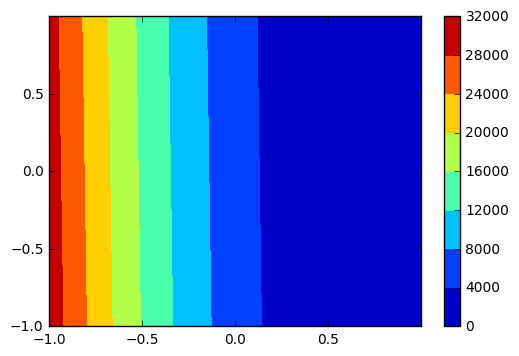

In [26]:
fig = plt.figure()
plt.contourf(theta0_vector, theta1_vector, loss)
plt.colorbar()
plt.show()

We can look at what the function from "further away":

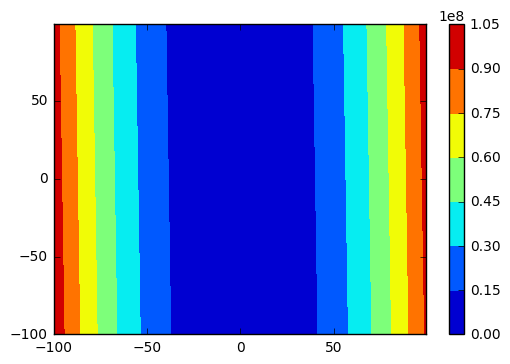

In [27]:
dtheta = 1.
# from -100 to +100 on both axis
theta0_vector = np.arange(-100,100, dtheta)
theta1_vector = np.arange(-100,100, dtheta)
n0 = len(theta0_vector)
n1 = len(theta1_vector)
loss = np.zeros([n0, n1])
for i0 in range(n0):
    for i1 in range(n1):
        loss[i0, i1] = cost_function_total(X, Y, [theta0_vector[i0], theta1_vector[i1]])
fig = plt.figure()
plt.contourf(theta0_vector, theta1_vector, loss)
plt.colorbar()
plt.show()

It appears that the function behaves very differently on the two different axis:
- It varies very fast on the horizontal axis
- It varies very slowly on the vertical axis

**Question**: What could this be due to? How could we solve this issue?

**Answer**: This is due to the fact that the two features (the size and the intercept) are on very different scales: the intercept is constantly equal to 1, while the size of the house varies on a much wider range (up to 102). In our algorithm, we make no difference between $\theta_0$ and $\theta_1$: the same step-size is 
A way to address this issue is to normalize (or rescale) the features. There are several ways to do it:
1. The first way consists in, for each feature, dividing all the feature values by its maximal value. In the case of the house size, it would consist in dividing all the house sizes by 102, so that the biggest house would have a size of 1.
2. Another way consists in computing the $z$-score of the feature:
$$ z = \dfrac{x - x_{\min}}{x_{\max} - x_{\min}} $$
so that the feature respectively has 0 and 1 as minimum and maximum value. Note that this does not apply to the intercept $x_0$, because it is constantly equal to $1$.

**Homeworks**: 
1. Implement the feature normalization of your choice. Run the OLS algorithm on it, and compare the result with the non-normalized regression. 
2. The gradient descent we have implemented seems to lower the loss smoothly. The impelmentation we proposed did 100 iterations, and we can see that the loss function values is not changing much after 40-50 iterations. Could you think of a way to stop the algorithm to avoid having too many iterations giving a very marginal gain in the loss function?
3. Add an *outlier* to the training set (for example, a house with a normal size but a very small or very big price), and run the OLS algorithm on it. What impact does the outlier have on the quality of the regression? How to correct this issue?

In the next session, we will talk about regularization and how to define a more complex model when the data is not linearly separable.

Let's apply the following transformation:
$$ z = \dfrac{x - x_{\min}}{x_{\max} - x_{\min}} $$
To do so, we need to compute the min and max values of $X$. Let's also define a function that computes $z$ given $x$

In [28]:
x_min = X[0][1]
x_max = X[0][1]
for i in range(len(X)):
    x_min = min(x_min, X[i][1])
    x_max = max(x_max, X[i][1])
    
def rescale(x):
    return (x - x_min)/(x_max - x_min)

Let's now apply this transformation to all the element of $X$.

**Remark**: We keep the intercept as it is, without applying the transformation to it.

In [29]:
Z = [[x[0], rescale(x[1])] for x in X]
print Z

[[1.0, 0.3157894736842105], [1.0, 0.6578947368421053], [1.0, 0.0], [1.0, 1.0]]


The intercept remains unchanged, and the second value of each instance (which corresponds to the area of the house) is between 0 and 1.

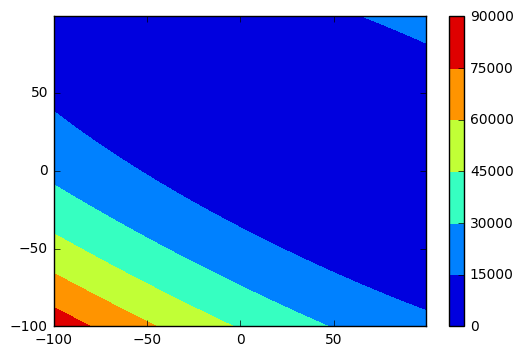

In [30]:
dtheta = 1.
# from -100 to +100 on both axis
theta0_vector = np.arange(-100,100, dtheta)
theta1_vector = np.arange(-100,100, dtheta)
n0 = len(theta0_vector)
n1 = len(theta1_vector)
loss = np.zeros([n0, n1])
for i0 in range(n0):
    for i1 in range(n1):
        loss[i0, i1] = cost_function_total(Z, Y, [theta0_vector[i0], theta1_vector[i1]])
fig = plt.figure()
plt.contourf(theta0_vector, theta1_vector, loss)
plt.colorbar()
plt.show()

We can now apply the gradient algorithm we've defined previously.

Optimization complete. Final loss = 5252.21972017


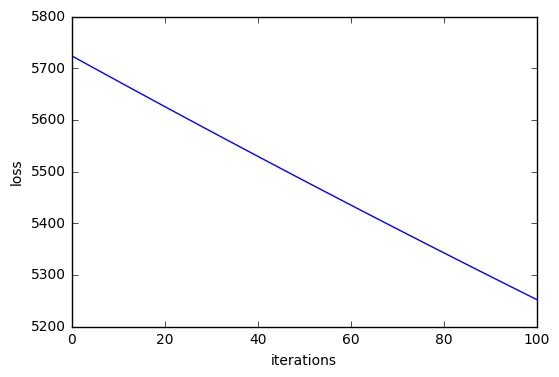

In [31]:
def gradient_descent(X, Y, alpha):
    theta = [0, 0] # initializing theta with zeros (it can be initialized in another manner)
    n_iteration_max = 100
    loss_history = []
    theta_history = [theta]
    for i_iteration in range(n_iteration_max):
        loss = cost_function_total(X, Y, theta)
        loss_history.append(loss)
        # print("Iteration {:>2}. Current loss = {}".format(i_iteration, loss))
        theta = gradient_descent_step(X, Y, theta, alpha)
        theta_history.append(theta)
    loss = cost_function_total(X, Y, theta)
    loss_history.append(loss)
    print("Optimization complete. Final loss = {}".format(loss))
    plt.plot(loss_history)
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.show()
    return theta_history, loss_history

alpha = 0.0001
theta_history_gd, loss_history_gd = gradient_descent(Z, Y, alpha)

The loss is constantly going down, and does not seem to have reached its minimal value. This is because we chose $\alpha = 0.0001$, which isn't appropriate in this case. $\alpha$ is way too small, hence we are doing tiny steps and it would take a long time for the algorithm to converge. 

**Note**: As previously, the chosen value for $\alpha$ is still important, if we take $\alpha = 1$, the algorithm would diverge:

Optimization complete. Final loss = 1.27791089223e+126


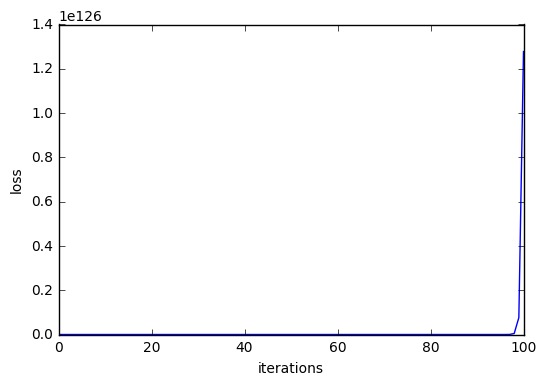

In [32]:
alpha = 1.
theta_history_gd, loss_history_gd = gradient_descent(Z, Y, alpha)

Instead, let us try with a higher value, say $\alpha = 0.1$. 

Optimization complete. Final loss = 77.5635217298


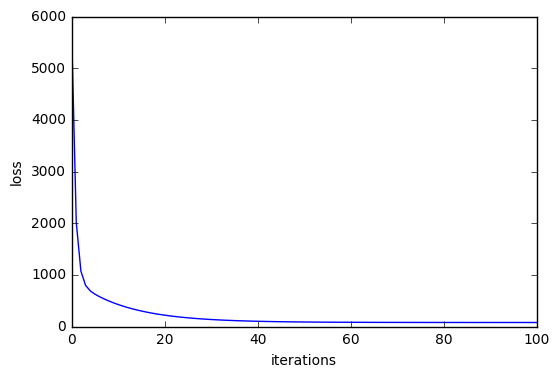

In [33]:
alpha = 0.1
theta_history_gd, loss_history = gradient_descent(Z, Y, alpha)

$\alpha = 0.1$ seems to work much better, the loss function is decreasing fast at the beginning and seems to reach a loss function value of about 77. 

**Note**: This loss function value is different than the one we used to have without rescaling the $x$ value (77 vs. 186). This is completely normal, because rescaling $X$ into $Z$ changes the loss function value, which becomes
$$J(\theta) = \dfrac{1}{2} \sum_{i = 1}^{n} \left( h\left(z^{(i)}\right) - y^{(i)} \right)^2$$
instead of:
$$J(\theta) = \dfrac{1}{2} \sum_{i = 1}^{n} \left( h\left(x^{(i)}\right) - y^{(i)} \right)^2$$
($x^{(i)}$ is replaced by $z^{(i)}$ in the formula). As a consequence, having 77 rather than 186 doesn't mean we're doing a better job than before!

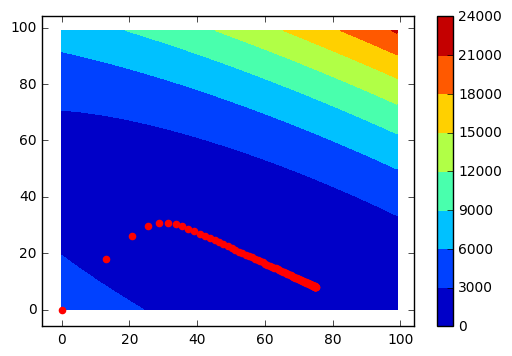

In [34]:
dtheta = 1.
# from -100 to +100 on both axis
theta0_vector = np.arange(0,100, dtheta)
theta1_vector = np.arange(0,100, dtheta)
n0 = len(theta0_vector)
n1 = len(theta1_vector)
loss = np.zeros([n0, n1])
for i0 in range(n0):
    for i1 in range(n1):
        loss[i0, i1] = cost_function_total(Z, Y, [theta0_vector[i0], theta1_vector[i1]])
fig = plt.figure()
plt.contourf(theta0_vector, theta1_vector, loss)
plt.colorbar()
for theta in theta_history_gd:
    plt.scatter(theta[1], theta[0], color="red")
plt.show()

In [35]:
def stochastic_gradient_descent(X, Y, alpha):
    theta = [0, 0] # initializing theta with zeros (it can be initialized in another manner)
    n_iteration_max = 100
    loss_history = []
    n_samples = len(Y)
    theta_history = [theta]
    for i_iteration in range(n_iteration_max):
        i_sample = i_iteration % n_samples
        loss = cost_function_total(X, Y, theta)
        loss_history.append(loss)
        print("Iteration {:>2}. Current loss = {}".format(i_iteration, loss))
        theta = stochastic_gradient_descent_step(X[i_sample], Y[i_sample], theta, alpha) # run the gradient update on a single sample
        theta_history.append(theta)
    loss = cost_function_total(X, Y, theta)
    loss_history.append(loss)
    print("Optimization complete. Final loss = {}".format(loss))
    return theta_history, loss_history

Iteration  0. Current loss = 5724.0
Iteration  1. Current loss = 3010.65324468
Iteration  2. Current loss = 1241.90250205
Iteration  3. Current loss = 1685.27981891
Iteration  4. Current loss = 1531.97669995
Iteration  5. Current loss = 561.619526701
Iteration  6. Current loss = 561.695087339
Iteration  7. Current loss = 695.318232157
Iteration  8. Current loss = 931.834604454
Iteration  9. Current loss = 330.295243654
Iteration 10. Current loss = 345.298169418
Iteration 11. Current loss = 417.822472438
Iteration 12. Current loss = 602.618088081
Iteration 13. Current loss = 211.266945186
Iteration 14. Current loss = 238.350617633
Iteration 15. Current loss = 269.800372709
Iteration 16. Current loss = 418.37493939
Iteration 17. Current loss = 149.911533423
Iteration 18. Current loss = 186.356996994
Iteration 19. Current loss = 189.769183782
Iteration 20. Current loss = 312.8279513
Iteration 21. Current loss = 118.206916701
Iteration 22. Current loss = 161.719099727
Iteration 23. Current

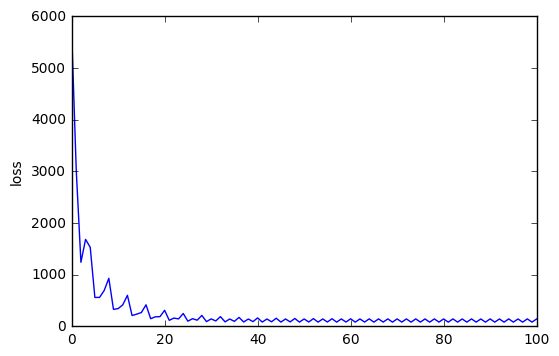

In [36]:
alpha = .5
theta_history_sgd, loss_history_sgd = stochastic_gradient_descent(Z, Y, alpha)
plt.plot(loss_history_sgd)
plt.ylabel('loss')
plt.show()

As it was the case previously, stochastic gradient descend seems to osciliate around the optimal position. Let us see how the weight vector $\theta$ evolves.

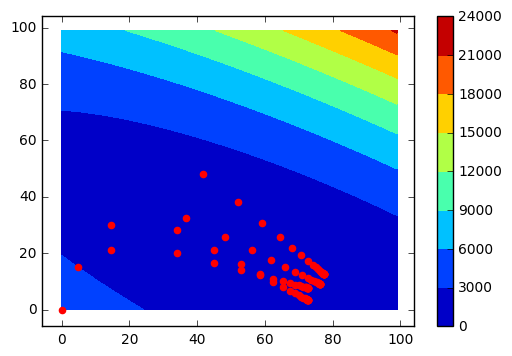

In [37]:
dtheta = 1.
# from -100 to +100 on both axis
theta0_vector = np.arange(0,100, dtheta)
theta1_vector = np.arange(0,100, dtheta)
n0 = len(theta0_vector)
n1 = len(theta1_vector)
loss = np.zeros([n0, n1])
for i0 in range(n0):
    for i1 in range(n1):
        loss[i0, i1] = cost_function_total(Z, Y, [theta0_vector[i0], theta1_vector[i1]])
fig = plt.figure()
plt.contourf(theta0_vector, theta1_vector, loss)
plt.colorbar()
for theta in theta_history_sgd:
    plt.scatter(theta[1], theta[0], color="red")
plt.show()

Optimization complete. Final loss = 89.968619039


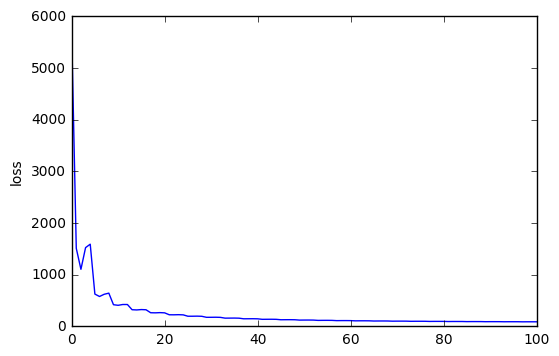

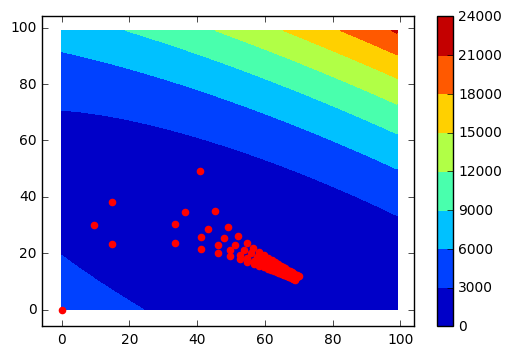

In [38]:
from math import sqrt
def stochastic_gradient_descent(X, Y, alpha):
    theta = [0, 0] # initializing theta with zeros (it can be initialized in another manner)
    n_iteration_max = 100
    loss_history = []
    n_samples = len(Y)
    theta_history = [theta]
    for i_iteration in range(n_iteration_max):
        i_sample = i_iteration % n_samples
        loss = cost_function_total(X, Y, theta)
        loss_history.append(loss)
        # change the learning rate
        alpha_sgd = alpha / sqrt(i_iteration + 1)
        theta = stochastic_gradient_descent_step(X[i_sample], Y[i_sample], theta, alpha_sgd) # run the gradient update on a single sample
        theta_history.append(theta)
    loss = cost_function_total(X, Y, theta)
    loss_history.append(loss)
    print("Optimization complete. Final loss = {}".format(loss))
    return theta_history, loss_history

alpha = 1.
theta_history_sgd, loss_history_sgd = stochastic_gradient_descent(Z, Y, alpha)
plt.plot(loss_history_sgd)
plt.ylabel('loss')
plt.show()

dtheta = 1.
# from -100 to +100 on both axis
theta0_vector = np.arange(0,100, dtheta)
theta1_vector = np.arange(0,100, dtheta)
n0 = len(theta0_vector)
n1 = len(theta1_vector)
loss = np.zeros([n0, n1])
for i0 in range(n0):
    for i1 in range(n1):
        loss[i0, i1] = cost_function_total(Z, Y, [theta0_vector[i0], theta1_vector[i1]])
fig = plt.figure()
plt.contourf(theta0_vector, theta1_vector, loss)
plt.colorbar()
for theta in theta_history_sgd:
    plt.scatter(theta[1], theta[0], color="red")
plt.show()